#### 1 Introduction to Data Privacy

Think about the example from the video about showing our face when we go about our day-to-day activities and when our face is used as a way of identification in facial recognition systems. Or the situation of someone sending an e-mail.

Among the following options, what is the most accurate definition of privacy?

The ability to ensure flows of information which satisfy social and legal norms.

![Screenshot 2023-05-18 at 3.47.05 PM.png](<attachment:Screenshot 2023-05-18 at 3.47.05 PM.png>)
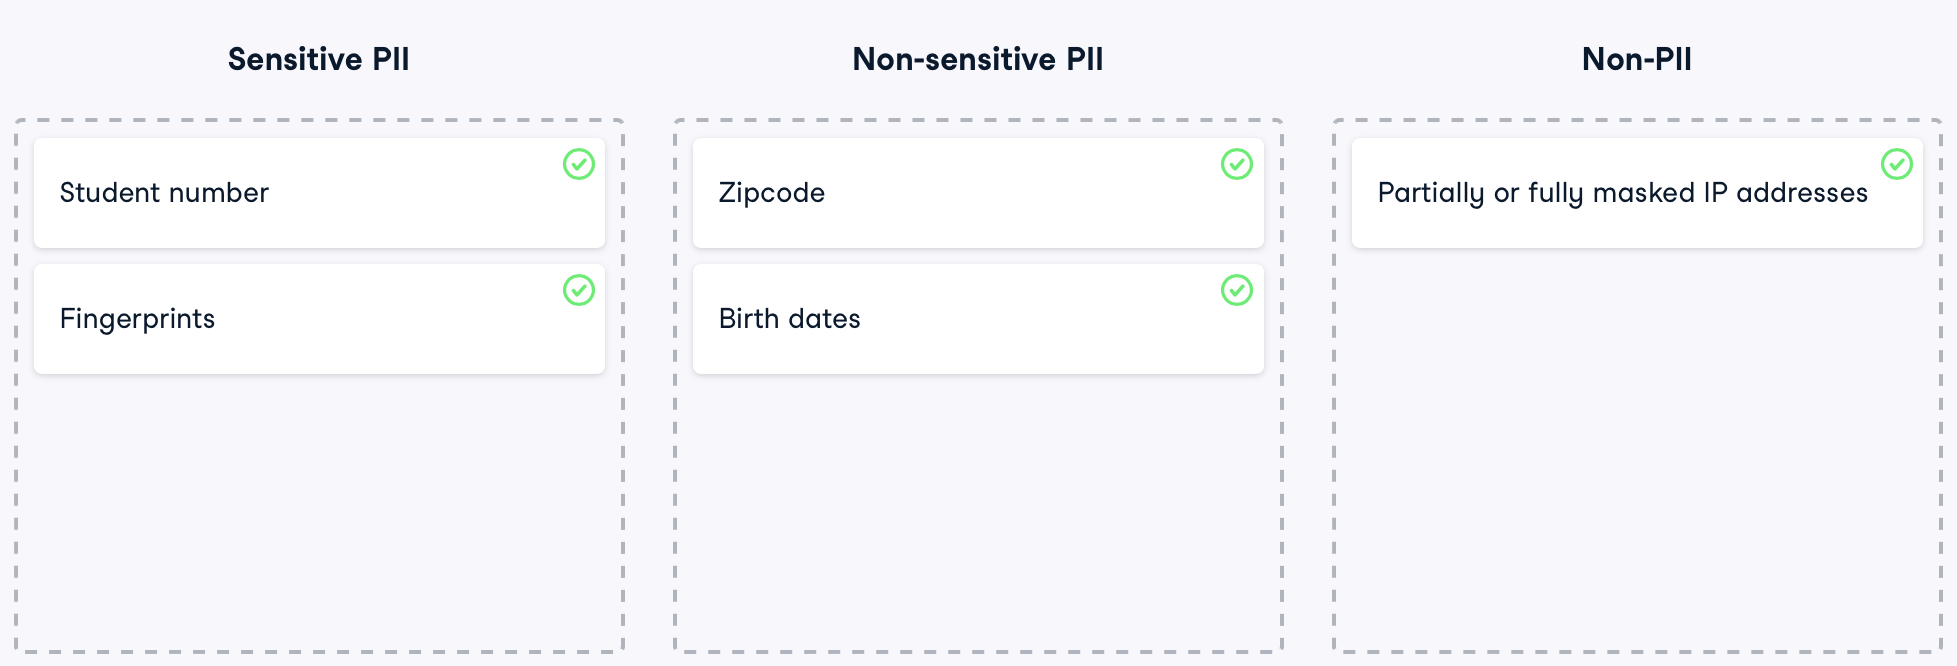

Explore the DataFrame loaded as clients_df in the interactive console. Which is the sensitive PII attribute?

Card Number

In [ ]:
# Apply attribute suppression on the Card_number column
suppressed_df = clients_df.drop(columns='card_number')

# Check the head of the resulting DataFrame
print(suppressed_df.head())

In [ ]:
# Apply record suppression for subjects younger than 30
record_suppressed = clients_df[(clients_df['age'] >= 30)]


# Explore the resulting DataFrame
print(record_suppressed.head())

From the resulting DataFrame record_suppressed, which of the non-sensitive PII variables could be combined to identify an individual?

Notice that the dataset is a very small one, with only 200 entries.

Any

In [ ]:
# Uniformly mask the SSN numbers with *
masked_df['ssn'] = '*'

# See resulting DataFrame
print(masked_df.head())

In [ ]:
# Import the Faker class
from faker import Faker

# Initialize the generator
fake_data = Faker()

In [ ]:
# Calculate the mean value of incomes
mean_income = int(hr['monthly_income'].mean().round())

# Apply generalization by transforming to binary data
hr['monthly_income'] = hr['monthly_income'].apply(lambda x: 1 if x > mean_income else 0)

# See resulting DataFrame
print(hr.head())

Thus far you have learned about data generalization and data aggregation. Although similar, they are somewhat distinct.

They both present personal information from a higher perspective or a wider spectrum. Would this be data aggregation?

Which of the following best describes the difference between the two concepts?


Data aggregation groups data only using relationships between its specific attributes while generalization can transform data into more imprecise ones regardless of their relationship.

In [ ]:
# Plot a histogram of salaries
wh2020['salary'].hist()
plt.show()

Based on the generated histogram, which of the following top and bottom coding values are most appropriate for this case?

190,000 and 37,000

In [ ]:
# Plot a histogram of salaries
wh2020['salary'].hist()
plt.show()

# Top code the salaries to 190000
wh2020.loc[wh2020['salary'] > 190000, 'salary'] = 190000

In [ ]:
# Plot a histogram of salaries
wh2020['salary'].hist()
plt.show()

# Top code the salaries to 190000
wh2020.loc[wh2020['salary'] >= 190000, 'salary'] = 190000 

# Bottom code the salaries to 37000
wh2020.loc[wh2020['salary'] < 37000, 'salary'] = 37000

#### 2 More on Privacy-Preserving Techniques

In [ ]:
# Print the absolute frequencies of each unique value
print(hr['business_travel'].value_counts())

In [ ]:
# Print the probability distribution of each unique value
print(hr['business_travel'].value_counts(normalize=True))

In [ ]:
# Generate a bar plot of the value counts
hr['business_travel'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
# Obtain the probability distribution counts 
counts = hr['department'].value_counts(normalize=True)

# Get the probability distribution values 
distributions = counts.values

# Sample from the calculated probability distributions
hr['department'] = np.random.choice(counts.index, 
                                    p=distributions, 
                                    size=len(hr))

# See the resulting DataFrame
print(hr.head())

To select the distribution that fits your data best, you need to try out several distributions and see which one fits best.

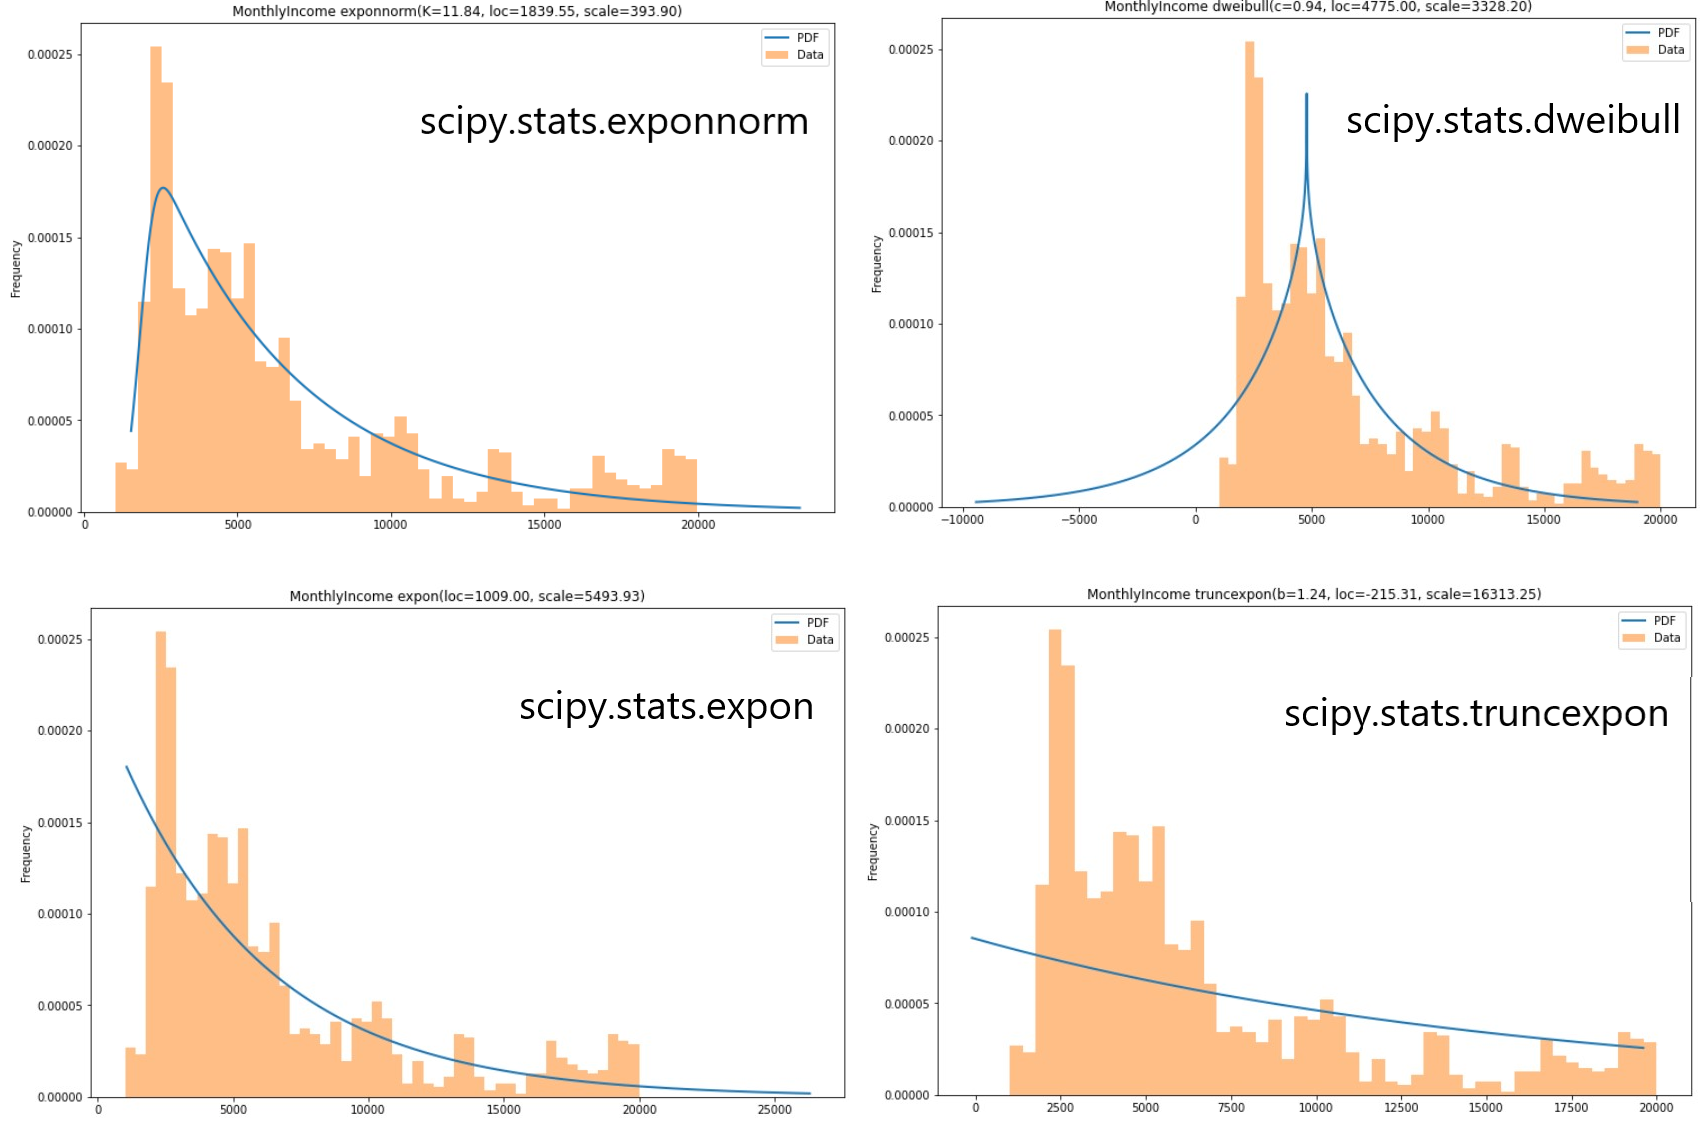

Here there are visualizations of continuous distribution models that were fit into the monthly_income column from the IBM HR dataset.
Which of the four distributions most closely fits the monthly_income data?


The exponnorm distribution fits better, according to the fitting line in the histogram.

In [ ]:
# Import stats from scipy
from scipy import stats

# Fit the exponnorm distribution to the continuous variable monthly income
params = stats.exponnorm.fit(hr['monthly_income'])

# Sample from the exponnorm distribution and replace monthly income
hr['monthly_income'] = stats.exponnorm.rvs(*params, size=len(hr))

# Round the salaries to their closest integer
hr['monthly_income'] =  hr['monthly_income'].round()

# See the resulting dataset
print(hr.head())

![Screenshot 2023-05-18 at 3.57.08 PM.png](<attachment:Screenshot 2023-05-18 at 3.57.08 PM.png>)
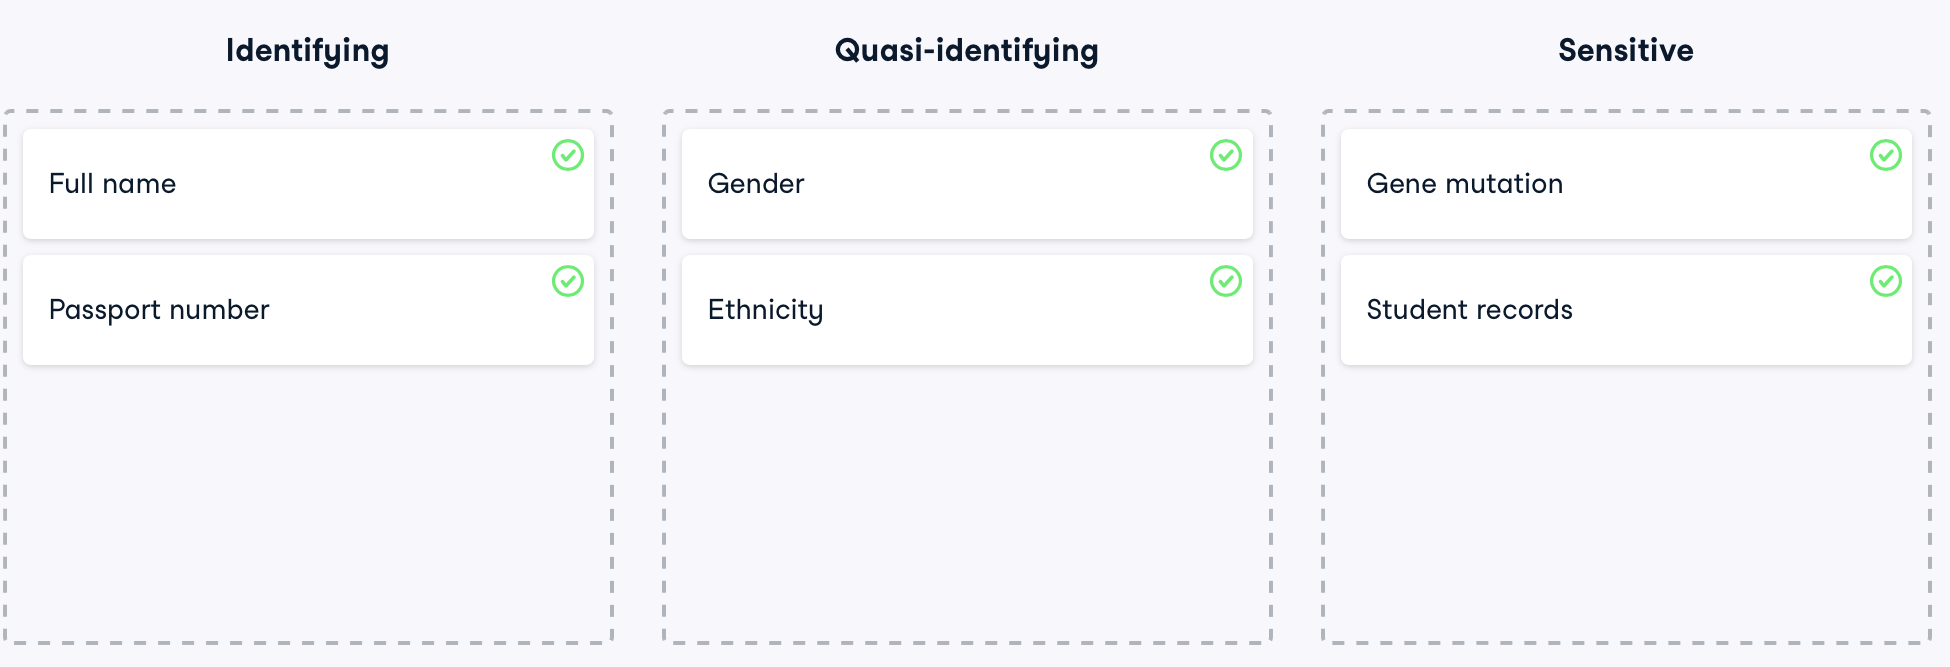

In [ ]:
# Calculate how many unique combinations are for BirthYear and Department
print(employees.groupby(['birth_year', 'department']).size().reset_index(name='count'))

In [ ]:
# Calculate how many unique combinations are for birth year and department
print(employees.groupby(['birth_year', 'department']).size().reset_index(name='count'))

# Generalize birth_year by creating 4 groups of intervals
employees['birth_year_group'] = pd.cut(employees['birth_year'], bins=4)

In [ ]:
# Calculate how many unique combinations are for birth year and department
print(employees.groupby(['birth_year', 'department']).size().reset_index(name='count'))

# Generalize birth_year by creating 4 groups of intervals
employees['birth_year_group'] = pd.cut(employees['birth_year'], bins=4)

# Calculate how many unique combinations are for birth_year and department
df_count = employees.groupby(['birth_year_group', 'department']).size().reset_index(name='count')

# Filter and print the rows that have a count value less than k
print(df_count[df_count['count'] < k])

In [ ]:
# Initialize dictionary for each education category value
education_hierarchy = {}

# Create hierachy for each of the education category values
for (key,education_values) in hierarchies.items():
    for education in education_values:
        education_hierarchy[education] = key

# Apply education_hierarchy generalization to bachelors
income_df['bachelors_generalized'] = income_df['bachelors'].map(education_hierarchy)
# See resulting dataset
print(income_df.head())

In [ ]:
# Print how many unique combinations are for age and nba_origin
print(nba.groupby(['age', 'nba_origin']).size().reset_index(name='count'))

In [ ]:
# Generalize age by creating 4 groups of intervals
nba['age_group'] = pd.cut(nba['age'], bins=4)

# Print the first 10 rows
print(nba.head(10))

In [ ]:
# Generalize age by creating 4 groups of intervals
nba['age_group'] = pd.cut(nba['age'], bins=4)

# Calculate how many unique combinations are for age and nba_origin
df_count = nba.groupby(['age_group', 'nba_origin']).size().reset_index(name='count')

# Filter and print the rows that have count from 0 to less than k
print(df_count[(df_count['count'] > 0) & (df_count['count'] < k)])

In [ ]:
# Generalize age by creating 4 groups of intervals
nba['age_group'] = pd.cut(nba['age'], bins=4)

# Calculate how many unique combinations are for age and nba_origin
df_count = nba.groupby(['age_group', 'nba_origin']).size().reset_index(name='count')

# Filter the rows that have count from 0 to less than k
df_count[(df_count['count'] > 0)  & (df_count['count'] < k)] 

# Apply origin_hierarchy hierarchy generalization to nba_origin
nba['nba_origin_generalized'] = nba['nba_origin'].map(origin_hierarchy)

# Filter the rows that have count from 0 to less than k
df_count = nba.groupby(['age_group', 'nba_origin_generalized']).size().reset_index(name='count')
print(df_count[(df_count['count'] > 0) & (df_count['count'] < k)] )

#### 3 Differential Privacy

One of differential privacy's great successes is that it reduces the essential trade-off in privacy-preserving data analysis, accuracy versus privacy, to a single number.

In differential privacy systems, if the value of epsilon () is a small number, what does it means for the resulting data?


The resulting data is more private and less accurate.

In [ ]:
# Get counts and bars for non-private histogram of ages
counts, bins = np.histogram(heart_df['age'].values)

# Normalize counts to get proportions
proportions = counts / counts.sum()

# Draw the histogram of proportions
plt.bar(bins[:-1], height=proportions, width=(bins[1] - bins[0]))
plt.show()

In [ ]:
# Get counts and bars for private histogram of ages
dp_counts, dp_bins = np.histogram(ages)

# Normalize counts to get proportions
dp_proportions = dp_counts / dp_counts.sum()

# Draw the histogram of proportions and see differences
plt.bar(dp_bins[:-1], height=dp_proportions, width=(dp_bins[1] - dp_bins[0]))
plt.show()

In [ ]:
# Get counts and bars for private histogram of ages with epsilon of 0.4
dp_counts, dp_bins = np.histogram(ages)

# Normalize counts to get proportions
dp_proportions = dp_counts / dp_counts.sum()

# Draw the histogram of proportions and see differences
plt.bar(dp_bins[:-1], height=dp_proportions, width=(dp_bins[1] - dp_bins[0]))
plt.show()

In [ ]:
# Initialize budget accountant with epsilon of 1.2
acc = acc = BudgetAccountant(epsilon=1.2)

In [ ]:
# Initialize budget accountant with epsilon of 1.2
acc = BudgetAccountant(epsilon=1.2)

# Calculate private mean of ages
dp_mean = tools.mean(ages, epsilon=0.5, accountant=acc)

# Print the resulting private mean 
print("Private mean: ", dp_mean)

In [ ]:
# Initialize budget accountant with epsilon of 1.2
acc = BudgetAccountant(epsilon=1.2)

# Calculate private mean of ages
dp_mean = tools.mean(ages, epsilon=0.5, accountant=acc)

# Print the resulting private mean 
print("Private mean: ", dp_mean)

# Obtain the total privacy spent
print("The total privacy spent is: ", acc.total())

# Obtain the remaining for 1 query
print("The remaining budget is: ", acc.remaining())

In [ ]:
# Budget accountant with epsilon of 0.1
acc = BudgetAccountant(epsilon=0.1)

Calculate the private average of reading_score, with an epsilon cost of 0.5, and the accountant acc, in the console. The tools module from diffprivlib has already been loaded.

An exception occurs with the message of privacy to spend not permissible

In [ ]:
# Create the privacy Budget Accountant with epsilon of 1.5
acc = BudgetAccountant(epsilon=1.5)

# Use the Budget Accountant acc to draw a private histogram of ages with epsilon 0.1
dp_hist, dp_bins = tools.histogram(ages, epsilon=0.1, range=[10,100], accountant=acc)
show_histogram(dp_hist, dp_bins)

# Get and show the private average of the age variable
print("Mean: ", tools.mean(ages, epsilon=0.9, bounds=(10, 100)))

# Show privacy budget remaining for 2 queries
print("Remaining budget for 2 queries: ", acc.remaining(2))
print("Number of queries recorded: ", len(acc))

In [ ]:
# Built the private classifier without parameters
dp_clf = dp_GaussianNB()

# Fit the model to the data
dp_clf.fit(X_train, y_train)

# Print the accuracy score
print("The accuracy with default settings is ", dp_clf.score(X_test, y_test))

In [ ]:
# Set the min and max of bounds for the data and add noise using random
bounds = (X_train.min(axis=0) - np.random.randint(5, 40, size=X_train.shape[1]),
          X_train.max(axis=0) + np.random.randint(5, 40, size=X_train.shape[1]))
# Built the classifier with epsilon of 0.5
dp_clf = dp_GaussianNB(epsilon=0.5, bounds=bounds)

# Fit the model to the data and print the score
dp_clf.fit(X_train, y_train)
print("The accuracy of the differentially private model is ",
       dp_clf.score(X_test, y_test))

In [ ]:
# Build the differentially private k-means model
model = KMeans(n_clusters=4)

# Fit the model to the data
model.fit(performance)

# Print the inertia in the console output
print("The inertia of the private model is: ", model.inertia_)

In [ ]:
# Initialize the standard scaler and fit transform the data performance
scaler = StandardScaler()
performance = scaler.fit_transform(performance)

# Initialize PCA and fit transform it to the data performance
pca = PCA()
performance = pca.fit_transform(performance)

# Build the differentially private k-means model
model = KMeans(n_clusters=4)

# Fit the model to the data
model.fit(performance)

print("The inertia of the private model after pre-processing data is: ",model.inertia_)

In [ ]:
# Build the differentially private K-means model
model = KMeans(n_clusters=5)

In [ ]:
# Build the differentially private K-means model
model = KMeans(n_clusters=5)

# Fit the model to the data
model.fit(X)

# Show the resulting clusters
show_clusters(X, model)

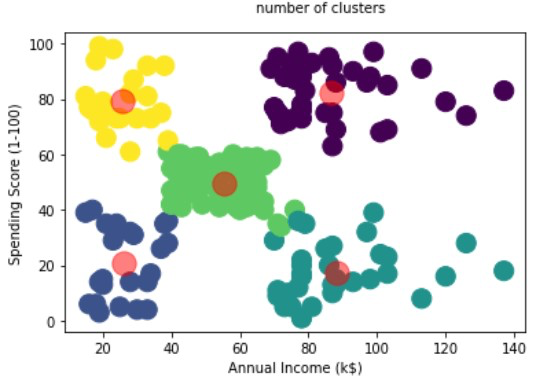

These are the clusters resulting from the K-means non-private model.
The dataset mall_df you just applied clustering on has total records of 199 rows. Comparing the models' results clusters, why are the results so different and less accurate than the non-private models?

The noise added by differentially private mechanisms affects accuracy much less when applied to smaller datasets

#### 4 Anonymizing and Releasing Datasets

Preserving privacy becomes inefficient due to the curse of dimensionality. The curse of dimensionality refers to a set of problems that arise when working with high-dimensional data. As the number of features or dimensions grows, the amount of data we need to generalize accurately grows exponentially. This is especially the case with k-anonymity: the more columns, the more complex reaching a k-anonymous dataset can be.

How does PCA work concerning the anonymization of datasets and dataset releases?

PCA can provide data values that are difficult to interpret if no more information is disclosed, and are also effective in high-dimensional datasets.

In [ ]:
# Import PCA from Scikit-learn
from sklearn.decomposition import PCA

# Initialize PCA with number of components to be the same as the number of columns
pca = PCA(n_components=len(players.columns))

# Apply PCA to the data
players_pca = pca.fit_transform(players)

# Print the resulting dataset
print(pd.DataFrame(players_pca))

In [ ]:
# Generate a name according to the gender that will be unique in the dataset
ratings['name'] = [fake_data.unique.name_female() if x == "Female" 
                   else fake_data.unique.name_male()
                   for x in ratings['gender']]

In [ ]:
# Generate a name according to the gender, that will be unique in the dataset
ratings['name'] = [fake_data.unique.name_female() if x == "Female" 
                   else fake_data.unique.name_male() 
                   for x in ratings['gender']]     

# Generate random company domain emails with username as their name
ratings['email'] = [x.replace(" ", "") + "@" + fake_data.domain_name() 
                    for x in ratings['name']]

In [ ]:
# Generate a name according to the gender, that will be unique in the dataset
ratings['name'] = [fake_data.unique.name_female() if x == "Female" 
                   else fake_data.unique.name_male() 
                   for x in ratings['gender']]   

# Generate random company domain emails with username as their name
ratings['email'] = [x.replace(" ", "") +"@"+ fake_data.domain_name() 
                    for x in ratings['name']]                                                                     

# Generate dates between current date and 2 years ago
ratings['date'] = [fake_data.date_between(start_date='-2y', end_date='now') for _ in range(len(ratings))]


# Inspect the DataFrame
print(ratings.head())

In [ ]:
# Obtain or specify the probabilities
p = (0.46, 0.26, 0.16, 0.1, 0.02)

# Generate 5 random cities 
cities = [fake_data.city() for _ in range(5)]

# See the generated cities
print(cities)

In [ ]:
# Obtain or specify the probabilities
p = (0.46, 0.26, 0.16, 0.1, 0.02)

# Generate 5 random cities 
cities = [fake_data.city() for x in range(5)]

# Sample 300 rows from the generated cities following the distribution
df['City'] = np.random.choice(cities, size=300, p=p)

# See the resulting dataset
print(df.head())

In [ ]:
# Import the function for generating classification datasets
from sklearn.datasets import make_classification

# Generate 5000 samples with 4 features, 1 cluster per class, 3 classes, and class separation of 2
x, y = make_classification(n_samples=5000, n_features=4, n_clusters_per_class=1, n_classes=3, class_sep=2)

# Inspect the generated data shape
print(x.shape)

# Inspect the resulting data points in a 2 dimensional scatter plot
plot_data_points(x, y)

In [ ]:
# Import the function from the datasets module for generating clustering datasets
from sklearn.datasets import make_blobs

# Generate a dataset with 15000 rows, 2 features, 2 centers, and a cluster std of 3
x, labels = make_blobs(n_samples=15000, n_features=2, centers=2, cluster_std=3)

# Print the shape of the resulting generated data
print(x.shape)

# See the resulting data points in a 2 dimensional scatter plot
plot_data_points(x, labels)

In [ ]:
# Print the summarized information of the DataFrame
print(students.info())

# Print the number of unique values in each column of students 
print(students.nunique())

Look at the resulting information in the console output. Which categories would require anonymization by sampling with np.random.choice()?

gender, ethnicity, and parents education.

In [ ]:
# Obtain the normalized probability distributions of ethnicity
distribution = students['ethnicity'].value_counts(normalize=True)

# Sample from the distribution and replace in the dataset
students['ethnicity'] = np.random.choice(distribution.index, size=len(students), p=distribution.values)

# See resulting dataset
print(students.head())

In [ ]:
# Drop unique data and almost unique data
df_dropped = hr.drop(["employee_number", "monthly_income", "monthly_rate", "daily_rate"], axis=1) 

# Drop the rows with NaN values
df_cleaned = df_dropped.dropna()

In [ ]:
# Drop unique data and almost unique data
df_dropped = hr.drop(["employee_number", "monthly_income", "monthly_rate", "daily_rate"], axis=1) 

# Drop the rows with NaN values
df_cleaned = df_dropped.dropna()

# Obtain the normalized probability distributions of Department
distribution = df_cleaned['department'].value_counts(normalize=True)

# Sample from the distribution and replace the department column
hr['department'] = np.random.choice(distribution.index, p=distribution.values, size=len(hr))

# See resulting dataset
print(hr.head())

In [ ]:
# Drop unique data and almost unique data
df_dropped = hr.drop(["employee_number", "monthly_income", "monthly_rate", "daily_rate"], axis=1) 

# Drop the columns with NaN values
df_cleaned = df_dropped.dropna()

# Obtain the normalized probability distributions of Department
distribution = hr['department'].value_counts(normalize=True)

# Sample from the distribution and replace in the dataset
hr['department'] = np.random.choice(distribution.index, p=distribution, size=len(df_cleaned))

# Replace the column names with numbers and see the new generated dataset
df_cleaned.columns = range(len(df_cleaned.columns))
print(df_cleaned.head())